## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

## Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

## Definitions of Churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

### Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

### Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The __‘good’ phase:__ In this phase, the customer is happy with the service and behaves as usual.

The __‘action’ phase:__ The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


### The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.
---------------
### Data Preparation
The following data preparation steps are crucial for this problem:

 

### 1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

### 2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

 

### 3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 

### Modelling
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

### Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

### Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, recommend strategies to manage customer churn based on your observations.

In [4]:
#Load Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex

import warnings
warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",300)

In [5]:
# Get the dataset
telecom = pd.read_csv(r"C:\Users\Ravi Verma\Documents\AIML\domain assignment\telecom\telecom_churn_data.csv")

In [6]:
#check the data
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [11]:
#Check the metadata with verbose( Show all the column names)
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

- __Dataset contains 99999 no of rows.__
- __226 no of columns.__
- __Number of Float data type - 179__
- __Number of int datatype - 35__
- __Number of object datatype- 12__


In [14]:
# Segregate Categorcial, ID and Numeric columns for ease of analysis

#Categorcial columns separation : categorical columns are only date here
date_columns = [col for col in telecom.columns if telecom[col].dtype =="object"]    
print(f"Total Categorical columns:{len(date_columns)}")

#ID columns separation
id_columns = ["mobile_number","circle_id"]  # total ID columns are 2 
print(f"Total numeric columns:{len(id_columns)}")

#Numeric columns separation
numeric_columns = [ col for col in telecom.columns if col not in date_columns + id_columns]    
print(f"Total numeric columns:{len(numeric_columns)}")  

Total Categorical columns:12
Total numeric columns:2
Total numeric columns:212


In [15]:
#check the date columns
telecom[date_columns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


- last_date_of_month_6
- last_date_of_month_7 ,
- last_date_of_month_8,
- last_date_of_month_9

The above columns have only one value - That is the last day of correspnding month
- Hence we can drop these columns

- date_of_last_rech_6,
- date_of_last_rech_7,
- date_of_last_rech_8,
- date_of_last_rech_9

Date of Last recharge of corresponding month also can be dropped, 
We are not going to derive anything from these dates


- date_of_last_rech_data_6,
- date_of_last_rech_data_7
- date_of_last_rech_data_8
- date_of_last_rech_data_9

These columns also can be dropped.

## Missing value Treatment and Initial data analysis

In [16]:
#check the Null values column wise
(telecom.isnull().sum()/len(telecom)).sort_values(ascending = False)

arpu_3g_6                   0.748467
night_pck_user_6            0.748467
total_rech_data_6           0.748467
arpu_2g_6                   0.748467
max_rech_data_6             0.748467
fb_user_6                   0.748467
av_rech_amt_data_6          0.748467
date_of_last_rech_data_6    0.748467
count_rech_2g_6             0.748467
count_rech_3g_6             0.748467
date_of_last_rech_data_7    0.744287
total_rech_data_7           0.744287
fb_user_7                   0.744287
max_rech_data_7             0.744287
night_pck_user_7            0.744287
count_rech_2g_7             0.744287
av_rech_amt_data_7          0.744287
arpu_2g_7                   0.744287
count_rech_3g_7             0.744287
arpu_3g_7                   0.744287
total_rech_data_9           0.740777
count_rech_3g_9             0.740777
fb_user_9                   0.740777
max_rech_data_9             0.740777
arpu_3g_9                   0.740777
date_of_last_rech_data_9    0.740777
night_pck_user_9            0.740777
a

- Many false null value columns are available. if customer did not recharge, the value assigned as NaN
- Hence we __can not__ drop these values blindly.
- We can impute these columns as __zero__.


- When customer did not recharge,the total_rech_data_*  and date_of_last_rech_data_* are null
    - Total Recharge data in month 6,7,8,9 would be null
    - Maximum Recharge Data in Month 6,7,8 ,9 would be null
    - Average Amount recharge Data in Month 6,7,8,9, would be null
    
- Hence this NULL __can not__ be dropped out.
- We will impute with Zero.


In [17]:
# when total_rech_data and date_of_last_rech_data is null, Check date_of_last_rech_data,total_rech_data,max_rech_data etc. 
telecom[telecom["total_rech_data_6"].isna() & telecom["date_of_last_rech_data_6"].isna()][ \
    ["date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","max_rech_data_6","av_rech_amt_data_6"]]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,max_rech_data_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN


In [18]:
# Columns which we have to impute as Zero.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# Put zero in these columns
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

Below columns are imputed with zeros.<br>
- Total Recharge data in month 6,7,8,9 
- Maximum Recharge Data in Month 6,7,8 ,9
- Average Amount recharge Data in Month 6,7,8,9,


In [19]:
# We will drop date columns and ID columns as these will not contribute further to our analysis.

telecom.drop(columns=id_columns,inplace=True)
telecom.drop(columns=date_columns,inplace=True)

In [20]:
# Check the columns associated with month 6 . From this, we can get an overview of columns/features in 7,8,9 months
month_6_cols = [col for col in telecom.columns if "_6" in col]
print(len(month_6_cols))
month_6_cols

51


['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [21]:
# check how the data looks for month 6
telecom[month_6_cols].head(10)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,34.047,24.11,15.74,0.00,0.00,23.88,11.51,0.00,0.00,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,44,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,167.690,11.54,143.33,0.00,0.00,7.19,29.34,24.11,0.00,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,221.338,99.91,123.31,0.00,0.00,73.68,107.43,1.91,0.00,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,30,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,261.636,50.31,76.96,0.00,0.00,50.31,67.64,0.00,0.00,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,50,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0
5,50.258,50.16,19.28,0.00,0.00,50.16,16.39,0.00,0.00,66.56,0.00,0.00,2.88,0.0,2.88,0.0,0.00,0.00,69.44,28.73,49.19,0.00,77.93,0.00,0.00,77.03,0.0,77.03,155.39,0.43,0.00,0.00,2,120,120,120,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
6,429.023,71.03,262.73,0.00,0.00,71.03,252.23,10.38,0.11,333.64,0.00,0.00,0.00,0.0,0.00,0.0,0.11,0.00,333.76,1857.99,248.64,20.24,2126.89,0.00,1.39,0.00,0.0,1.39,2128.41,0.00,0.00,0.11,15,499,90,37,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,4.30,49.89,6.66,0.0,60.86,0.0,4.50,0.00,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,0.0,180.54,626.46,0.21,2.06,15.74,5,1580,1580,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,116.56,13.69,0.00,0.0,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,0.0,22.43,103.86,0.00,0.00,0.00,19,437,90,50,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
9,119.518,33.89,63.48,0.00,0.00,33.89,38.03,0.00,0.00,71.93,0.00,25.45,0.00,0.0,25.45,0.0,0.66,0.00,98.04,129.34,132.94,0.40,262.69,0.30,32.86,0.00,0.0,33.16,303.98,0.00,8.11,0.00,4,220,110,110,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN


In [22]:
# Check again the null values percentages
(telecom.isnull().sum()/len(telecom)).sort_values(ascending = False).head(50)

count_rech_2g_6     0.748467
night_pck_user_6    0.748467
fb_user_6           0.748467
arpu_2g_6           0.748467
arpu_3g_6           0.748467
count_rech_3g_6     0.748467
count_rech_2g_7     0.744287
count_rech_3g_7     0.744287
night_pck_user_7    0.744287
arpu_3g_7           0.744287
arpu_2g_7           0.744287
fb_user_7           0.744287
night_pck_user_9    0.740777
arpu_3g_9           0.740777
count_rech_3g_9     0.740777
fb_user_9           0.740777
arpu_2g_9           0.740777
count_rech_2g_9     0.740777
arpu_3g_8           0.736607
arpu_2g_8           0.736607
night_pck_user_8    0.736607
count_rech_2g_8     0.736607
fb_user_8           0.736607
count_rech_3g_8     0.736607
std_og_mou_9        0.077451
std_og_t2c_mou_9    0.077451
loc_ic_t2t_mou_9    0.077451
isd_og_mou_9        0.077451
std_og_t2f_mou_9    0.077451
og_others_9         0.077451
std_ic_t2t_mou_9    0.077451
loc_ic_t2m_mou_9    0.077451
loc_ic_t2f_mou_9    0.077451
loc_ic_mou_9        0.077451
std_ic_t2m_mou

- __Night pack user columns and FB User columns are categorical column.__
- "night_pck_user_6"    
- "night_pck_user_7"    
- "night_pck_user_8"    
- "night_pck_user_9"    
- "fb_user_6"           
- "fb_user_7"           
- "fb_user_8"           
- "fb_user_9"   

In [23]:
# Check night_pck_user unique values in month 6
telecom["night_pck_user_6"].unique()

array([ 0., nan,  1.])

In [24]:
#Check the percetages null values of these columns
categorical_columns = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6",          
"fb_user_7",          
"fb_user_8",           
"fb_user_9"]

telecom[categorical_columns].isna().sum()/len(telecom)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

-  __In the above columns,We can impute the NaN as  -1, as a part to mark as missing value.__

In [25]:
#Fill NaN value as -1 to mark missing value
telecom[categorical_columns] = telecom[categorical_columns].fillna(-1)

In [26]:
# Check if the null value is filled with -1
telecom[categorical_columns].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

- __Hence there are no null values in night_pck_user and fb_user columns in month 6,7,8,9.__

In [27]:
#Check the null value pecentage
(telecom.isna().sum()/len(telecom)).sort_values(ascending=False)

arpu_3g_6             0.748467
count_rech_3g_6       0.748467
count_rech_2g_6       0.748467
arpu_2g_6             0.748467
arpu_3g_7             0.744287
count_rech_3g_7       0.744287
count_rech_2g_7       0.744287
arpu_2g_7             0.744287
count_rech_3g_9       0.740777
arpu_3g_9             0.740777
arpu_2g_9             0.740777
count_rech_2g_9       0.740777
count_rech_2g_8       0.736607
count_rech_3g_8       0.736607
arpu_2g_8             0.736607
arpu_3g_8             0.736607
std_og_t2t_mou_9      0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_t2c_mou_9      0.077451
std_og_mou_9          0.077451
spl_og_mou_9          0.077451
og_others_9           0.077451
std_ic_t2t_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t2f_mou_9      0.077451
loc_ic_mou_9          0.077451
loc_og_t2c_mou_9      0.077451
std_ic_t2m_mou_9      0.077451
std_ic_t2o_mou_9      0.077451
std_ic_mou_9          0.077451
spl_ic_m

In [28]:
# Many columns have more than 70% null values
#Function to drop columns where there are more than 50% null values
def columns_tobe_dropped(cols):
    '''cols: list of columns in dataframe
      '''
    for col in cols:
        if (telecom[col].isna().sum()/len(telecom)) > .50:   # Check the condition if null values GT .50
            telecom.drop(columns=[col],inplace=True)



In [29]:
# drop colums 
columns_tobe_dropped(telecom.columns)

In [30]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(163), int64(33)
memory usage: 149.5 MB


- We have removed 30 columns from the dataframe 

In [31]:
# check the null value row wise.
telecom.isna().sum(axis=1).sort_values(ascending = False).head(30)

51296    119
47936    119
48177    119
48376    119
48474    119
48582    119
48651    119
48707    119
48740    119
48839    119
49153    119
49211    119
49582    119
49594    119
49651    119
49772    119
49857    119
49903    119
49909    119
49981    119
50006    119
48138    119
47786    119
45426    119
47739    119
45836    119
46033    119
46295    119
46515    119
46694    119
dtype: int64

- We have many rows having multiple null values. We are not dropping these and will fill these gradually

In [32]:
# check the null value again
(telecom.isna().sum()/len(telecom)).sort_values(ascending = False)

std_ic_t2t_mou_9      0.077451
loc_og_t2t_mou_9      0.077451
loc_og_t2f_mou_9      0.077451
loc_og_t2c_mou_9      0.077451
loc_og_mou_9          0.077451
std_og_t2t_mou_9      0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_mou_9          0.077451
isd_og_mou_9          0.077451
spl_og_mou_9          0.077451
og_others_9           0.077451
spl_ic_mou_9          0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t2f_mou_9      0.077451
loc_ic_mou_9          0.077451
std_ic_t2m_mou_9      0.077451
std_ic_t2f_mou_9      0.077451
std_ic_t2o_mou_9      0.077451
std_ic_mou_9          0.077451
loc_og_t2m_mou_9      0.077451
std_og_t2c_mou_9      0.077451
roam_og_mou_9         0.077451
ic_others_9           0.077451
onnet_mou_9           0.077451
roam_ic_mou_9         0.077451
isd_ic_mou_9          0.077451
offnet_mou_9          0.077451
spl_og_mou_8          0.053781
std_og_t2c_mou_8      0.053781
og_others_8           0.053781
std_og_t

In [33]:
#check columns which have only 1 value.

# Create a DataFrame of no of unique  values and filter where only one value is available.
zero_variance_columns = pd.DataFrame(telecom.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(zero_variance_columns[zero_variance_columns['nunique'] == 1])

              feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1


- The above columns have just one Unique value.
- Hence they have zero variance and can be dropped.


In [34]:
# create columns list whihc have zero variance i:e 1 unique value.
columns_tobe_dropped = list(zero_variance_columns[zero_variance_columns['nunique'] == 1]["feature"])
columns_tobe_dropped

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [35]:
# drop columns whish are having 1 unique values
telecom.drop(columns=columns_tobe_dropped,inplace=True)

In [36]:
#check the shape
telecom.shape

(99999, 185)

In [37]:
# Check the null values again
(telecom.isna().sum()/len(telecom)).sort_values(ascending=False).reset_index()

,index,0
0,loc_ic_mou_9,0.077451
1,loc_og_mou_9,0.077451
2,std_ic_t2t_mou_9,0.077451
3,loc_og_t2m_mou_9,0.077451
4,loc_ic_t2t_mou_9,0.077451
5,spl_ic_mou_9,0.077451
6,std_ic_t2f_mou_9,0.077451
7,loc_og_t2f_mou_9,0.077451
8,loc_og_t2c_mou_9,0.077451
9,std_ic_t2m_mou_9,0.077451


- Still we have null values in 107 columns.
- Majority of the null values are in Minitue of Usage columns 
- As these values are not available, so we are imputing those values as 0 instead of iteratively imputing.


In [38]:
# Fill hr NaN as zero.
telecom = telecom.fillna(0)

In [39]:
telecom.isna().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

In [40]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 185 entries, arpu_6 to sep_vbc_3g
dtypes: float64(152), int64(33)
memory usage: 141.1 MB


- __Now thre is no null values in the data.__
- __still we have 99999 rows of data.__
- __No of columns reduced to 185 from 226.__

## Filter High Value Customer
- We need to predict churn only for the high-value customers. 
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge
  amount in the first two months (the good phase).



### Create derive columns to filter high value customer

In [41]:
#Calculate total Data recharge amount--> Total Data Recharge * Average Amount of Data recharge
telecom["total_data_recharge_amnt_6"] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom["total_data_recharge_amnt_7"] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [42]:
#Calculate Total Amount recharge --> total talktime recharge + total data recharge
telecom["total_recharge_amnt_6"] = telecom.total_rech_amt_6 + telecom.total_data_recharge_amnt_6
telecom["total_recharge_amnt_7"] = telecom.total_rech_amt_7 + telecom.total_data_recharge_amnt_7

In [43]:
#Calculate Average amount of recharge of 6th and 7th month
telecom['average_amnt_6_7'] = (telecom["total_recharge_amnt_6"] + telecom["total_recharge_amnt_7"])/2

In [44]:
# Check the 70th percentile of "average_amnt_6_7"
telecom['average_amnt_6_7'].quantile(.70)

478.0

- __70th percentile of average amount recharge in 6th and 7th month comes as 478.0.__
- Now we need to filter the data based on this value.


In [45]:
#filter based on 70th percentile .
telecom_highvalue = telecom[telecom["average_amnt_6_7"]>= telecom["average_amnt_6_7"].quantile(.70)]

In [46]:
#Delete the derived columns created in above step
telecom_highvalue.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

In [47]:
telecom_highvalue.shape

(30001, 185)

- __Finally we have 30001 rows of high value customer data with 185 columns.__


In [48]:
# check the data
telecom_highvalue.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00

## Tag churners and remove attributes of the churn phase

- Now we need to tag the churned customers (churn=1, else 0) based on the fourth month as follows: 

- __Those who have not made any calls (either incoming or outgoing) and  have not used mobile internet even once in the churn
  phase.__
  
- Based on these below attributes we need to decide churners

    - total_ic_mou_9

    - total_og_mou_9

    - vol_2g_mb_9

    - vol_3g_mb_9

In [49]:
#Calculate total call in mins by adding Incoming and Outgoing calls
telecom_highvalue['total_calls_9'] = telecom_highvalue.total_ic_mou_9 + telecom_highvalue.total_og_mou_9

In [50]:
# Calculate total 2G and 3G consumption of data
telecom_highvalue["total_data_consumptions"] = telecom_highvalue.vol_2g_mb_9 + telecom_highvalue.vol_3g_mb_9

- Now we need to create Churn variable.
- __Customer who have not used any calls or have not consumed any data on month of 9 are tagged as Churn customer.__
- Churn customer is marked as 1
- non-churn custoner is marked as 0

In [51]:
#Tag 1 as churner  where total_calls_9=0 and total_data_consumptions=0
# else 0 as non-churner
telecom_highvalue["churn"]=telecom_highvalue.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)


In [52]:
#check the percentages of churn and non churn data
telecom_highvalue["churn"].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

- __The data is imbalance.__ 
- __Churn percentage is close 8 and non-churn percentage is close to 92.__

In [53]:
#Drop the derived columns
telecom_highvalue.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

## Delete columns belong to the 9th month :Churn Month
- After tagging churners, remove all the attributes corresponding to the churn phase 
(all attributes having ‘ _9’, etc. in their names.

- These columns  contain data for users, where these users are already churned.
- Hence those will not contribute anything to churn prediction.

In [54]:
# drop all 9th month columns
telecom_highvalue = telecom_highvalue.filter(regex='[^9]$',axis=1)


In [55]:
# check the baisc info about high value customer
telecom_highvalue.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 141 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

- __Finally we have 30,001 rows of records and 141 columns are available to explore.__

## Exploratory Data Analysis

In [56]:
# Check the percenatges of churn and non-churn customers
telecom_highvalue["churn"].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

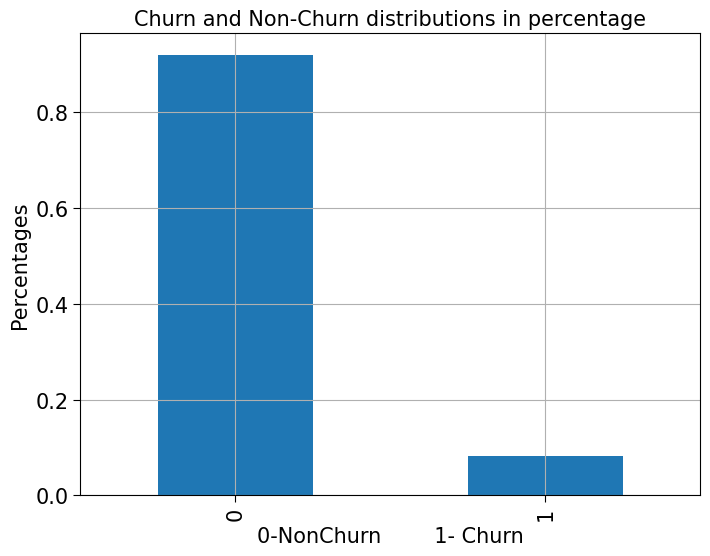

In [57]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
telecom_highvalue["churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=15)
plt.grid(0.3)
plt.show()

 - __We have 92% customers belong non-churn and 8% customers belong to Churn type.__

In [58]:
# check basic statistics
telecom_highvalue.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,

In [59]:
#check columns associated with month 6, From month 6 we can figure out how the columns and data are in other months
cols = [col for col in telecom_highvalue.columns if "_6" in col]
cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

### Derive new faetures by comparing month 8 features  vs month 6 and month 7 features.

In [60]:
#compare average revenue and calculate the difference
telecom_highvalue['arpu_diff'] = telecom_highvalue.arpu_8 - ((telecom_highvalue.arpu_6 + telecom_highvalue.arpu_7)/2)

# Check various columns related to Minutes of Usage and calculate difference
telecom_highvalue['onnet_mou_diff'] = telecom_highvalue.onnet_mou_8 - ((telecom_highvalue.onnet_mou_6 + telecom_highvalue.onnet_mou_7)/2)
telecom_highvalue['offnet_mou_diff'] = telecom_highvalue.offnet_mou_8 - ((telecom_highvalue.offnet_mou_6 + telecom_highvalue.offnet_mou_7)/2)
telecom_highvalue['roam_ic_mou_diff'] = telecom_highvalue.roam_ic_mou_8 - ((telecom_highvalue.roam_ic_mou_6 + telecom_highvalue.roam_ic_mou_7)/2)
telecom_highvalue['roam_og_mou_diff'] = telecom_highvalue.roam_og_mou_8 - ((telecom_highvalue.roam_og_mou_6 + telecom_highvalue.roam_og_mou_7)/2)
telecom_highvalue['loc_og_mou_diff'] = telecom_highvalue.loc_og_mou_8 - ((telecom_highvalue.loc_og_mou_6 + telecom_highvalue.loc_og_mou_7)/2)
telecom_highvalue['std_og_mou_diff'] = telecom_highvalue.std_og_mou_8 - ((telecom_highvalue.std_og_mou_6 + telecom_highvalue.std_og_mou_7)/2)
telecom_highvalue['isd_og_mou_diff'] = telecom_highvalue.isd_og_mou_8 - ((telecom_highvalue.isd_og_mou_6 + telecom_highvalue.isd_og_mou_7)/2)
telecom_highvalue['spl_og_mou_diff'] = telecom_highvalue.spl_og_mou_8 - ((telecom_highvalue.spl_og_mou_6 + telecom_highvalue.spl_og_mou_7)/2)
telecom_highvalue['total_og_mou_diff'] = telecom_highvalue.total_og_mou_8 - ((telecom_highvalue.total_og_mou_6 + telecom_highvalue.total_og_mou_7)/2)
telecom_highvalue['loc_ic_mou_diff'] = telecom_highvalue.loc_ic_mou_8 - ((telecom_highvalue.loc_ic_mou_6 + telecom_highvalue.loc_ic_mou_7)/2)
telecom_highvalue['std_ic_mou_diff'] = telecom_highvalue.std_ic_mou_8 - ((telecom_highvalue.std_ic_mou_6 + telecom_highvalue.std_ic_mou_7)/2)
telecom_highvalue['isd_ic_mou_diff'] = telecom_highvalue.isd_ic_mou_8 - ((telecom_highvalue.isd_ic_mou_6 + telecom_highvalue.isd_ic_mou_7)/2)
telecom_highvalue['spl_ic_mou_diff'] = telecom_highvalue.spl_ic_mou_8 - ((telecom_highvalue.spl_ic_mou_6 + telecom_highvalue.spl_ic_mou_7)/2)
telecom_highvalue['total_ic_mou_diff'] = telecom_highvalue.total_ic_mou_8 - ((telecom_highvalue.total_ic_mou_6 + telecom_highvalue.total_ic_mou_7)/2)

# Check total Recharge number
telecom_highvalue['total_rech_num_diff'] = telecom_highvalue.total_rech_num_8 - ((telecom_highvalue.total_rech_num_6 + telecom_highvalue.total_rech_num_7)/2)
#check total recharge amount
telecom_highvalue['total_rech_amt_diff'] = telecom_highvalue.total_rech_amt_8 - ((telecom_highvalue.total_rech_amt_6 + telecom_highvalue.total_rech_amt_7)/2)
#Check maximum recharge amount
telecom_highvalue['max_rech_amt_diff'] = telecom_highvalue.max_rech_amt_8 - ((telecom_highvalue.max_rech_amt_6 + telecom_highvalue.max_rech_amt_7)/2)
#check total recharge data
telecom_highvalue['total_rech_data_diff'] = telecom_highvalue.total_rech_data_8 - ((telecom_highvalue.total_rech_data_6 + telecom_highvalue.total_rech_data_7)/2)
#check maximum recharge data
telecom_highvalue['max_rech_data_diff'] = telecom_highvalue.max_rech_data_8 - ((telecom_highvalue.max_rech_data_6 + telecom_highvalue.max_rech_data_7)/2)
#Check average recharge amount in Data
telecom_highvalue['av_rech_amt_data_diff'] = telecom_highvalue.av_rech_amt_data_8 - ((telecom_highvalue.av_rech_amt_data_6 + telecom_highvalue.av_rech_amt_data_7)/2)
#check 2G data consumption difference in MB
telecom_highvalue['vol_2g_mb_diff'] = telecom_highvalue.vol_2g_mb_8 - ((telecom_highvalue.vol_2g_mb_6 + telecom_highvalue.vol_2g_mb_7)/2)
#Check 3G data consumption in MB
telecom_highvalue['vol_3g_mb_diff'] = telecom_highvalue.vol_3g_mb_8 - ((telecom_highvalue.vol_3g_mb_6 + telecom_highvalue.vol_3g_mb_7)/2)

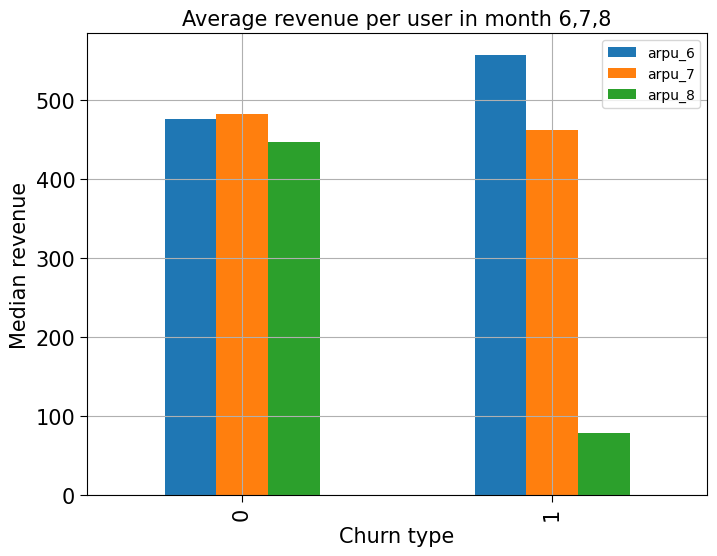

In [61]:
# Plot to visualize average revenue per user(ARPU)
telecom_highvalue.groupby("churn")["arpu_6","arpu_7","arpu_8"].median().plot.bar(figsize=[8,6])
plt.title("Average revenue per user in month 6,7,8",fontsize=15)
plt.tick_params(size=5,labelsize = 15) 
plt.ylabel("Median revenue",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Average revenue per user more in month 6 means, if they are unsatisfied, those useres are more likely to churn

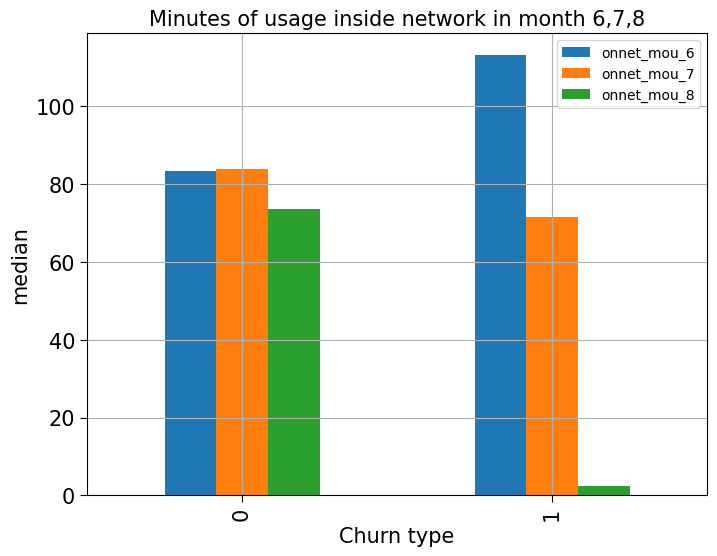

In [62]:
## Plot to visualize onnet_mou
telecom_highvalue.groupby("churn")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

 - __Users whose minutes of usage are more in month 6, they are more likely to churn.__

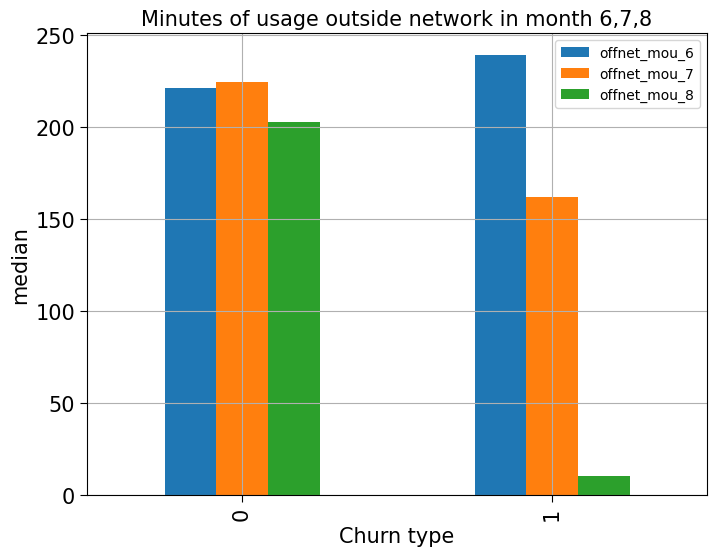

In [63]:
# Plot to visualize  offnet_mou
telecom_highvalue.groupby("churn")["offnet_mou_6","offnet_mou_7","offnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- __The users who have big difference of minutes of call duration  to other network between month 6 and month 7,are likely to churn.__ 

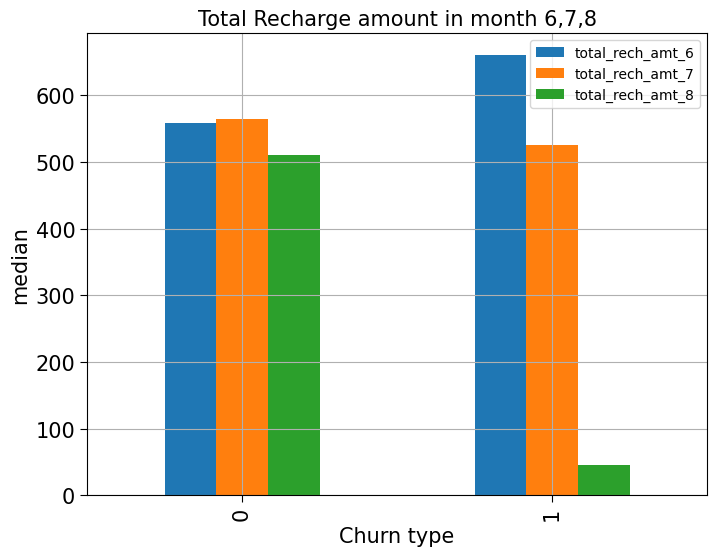

In [64]:
# Plot to visualize total_rech_amt
telecom_highvalue.groupby("churn")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge amount in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

-  __when the difference of total recharge amount is more, those users are more likely to churn.__

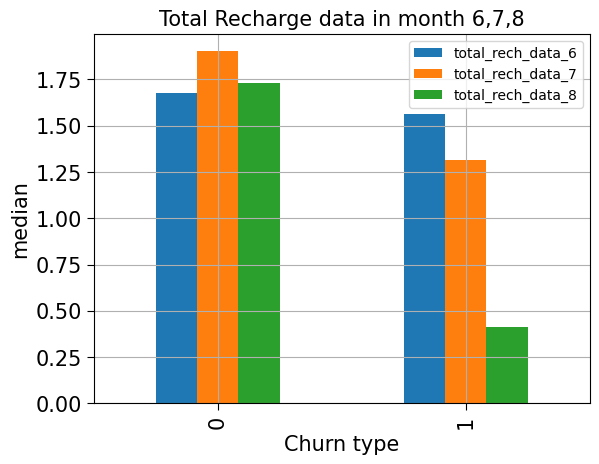

In [65]:
# Plot to visualize total_rech_data_
telecom_highvalue.groupby("churn")["total_rech_data_6","total_rech_data_7","total_rech_data_8" ].mean().plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge data in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

 -  __Users who have not recharge in month 6, 7, 8 may or may not churn, we do not have much evidence from data.__

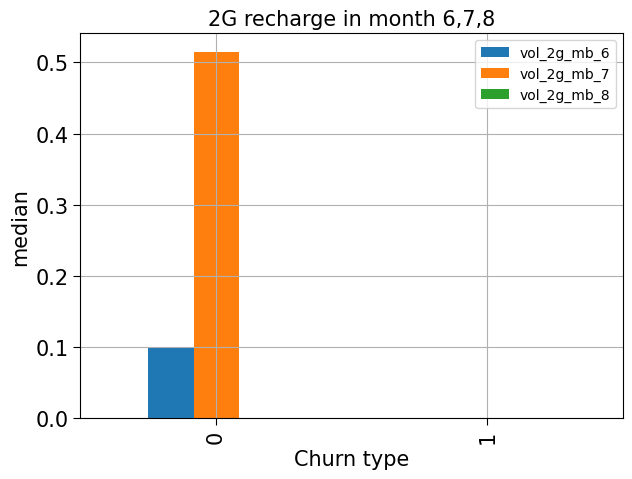

In [66]:
## Plot to visualize vol_2g_mb_6
telecom_highvalue.groupby("churn")["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8" ].median().plot.bar(figsize=[7,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("2G recharge in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

 - 2g recharge who have not done may or may not churn,There is no concrete evidence from data

In [67]:
#Check the percenatges of churn in each category of Night Pack Users in month 8
pd.crosstab(telecom_highvalue.churn, telecom_highvalue.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [68]:
#Check the percenatges of churn in each category of Facebook Users in month 6
(pd.crosstab(telecom_highvalue.churn, telecom_highvalue.fb_user_8, normalize='columns')*100)

fb_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,93.231707,97.568644
1,14.10877,6.768293,2.431356


- Night pack users(which we do not know whether using or not) in month 8 , high churn rate: close to 14%
- Among Facebook users in month 8,  close to 2%  churns
- Customers who are not using facebook, close to 7% churns in month 8
 
 

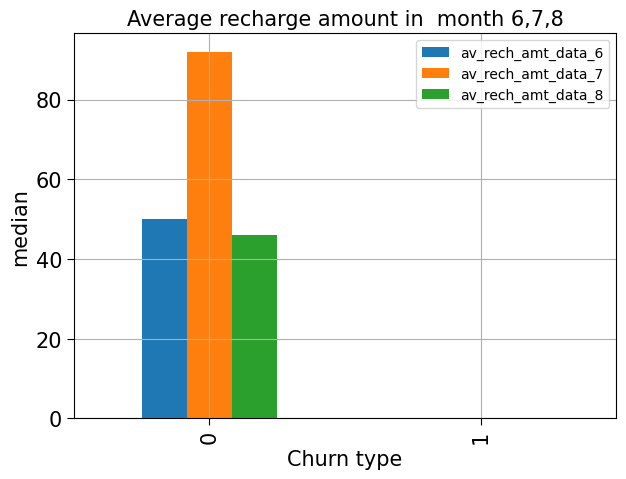

In [69]:
# plot to visualize av_rech_amt_data
telecom_highvalue.groupby("churn")["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8" ].median().plot.\
bar(figsize=[7,5])

plt.tick_params(size=5,labelsize = 15) 
plt.title("Average recharge amount in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Average recharge amount in  month 6,7,8 is none, from dataset, they are more likely to churn

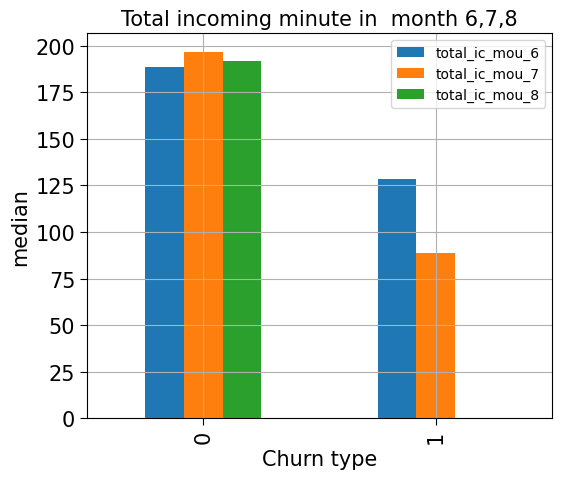

In [70]:
#Plot to visualize total_ic_mou
telecom_highvalue.groupby("churn")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total incoming minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

 - Users who have more difference in Total incoming minutes in month 6,7,8 are more likely to churn

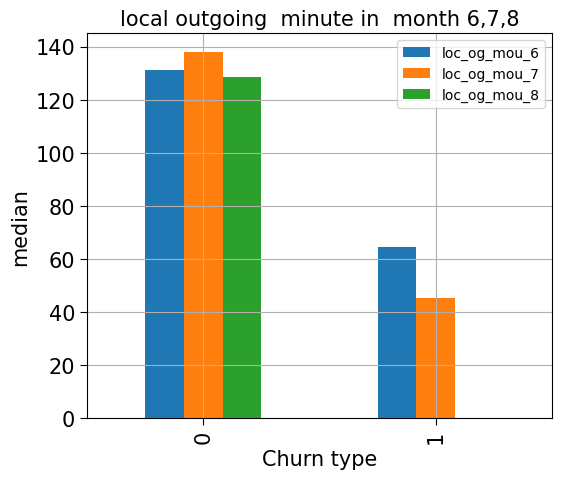

In [71]:
#plot to visualize loc_og_mou
telecom_highvalue.groupby("churn")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

 - local outgoing minute are less, users are more likely to churn

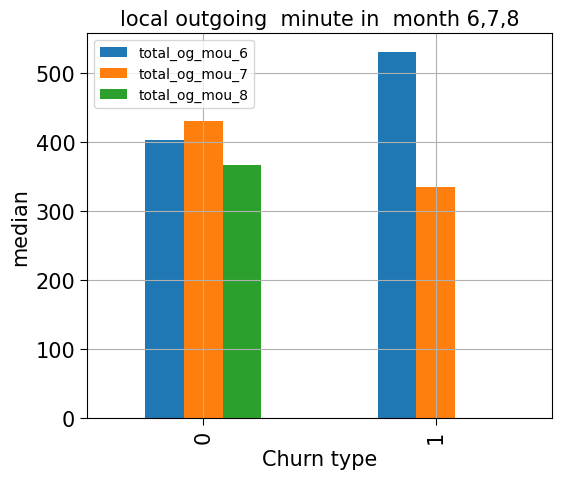

In [72]:
# total_og_mou_6
telecom_highvalue.groupby("churn")["total_og_mou_6","total_og_mou_7","total_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

 -  Total outgoing minute usage difference is more between month 6 and 7, users are mor likely to chrun 

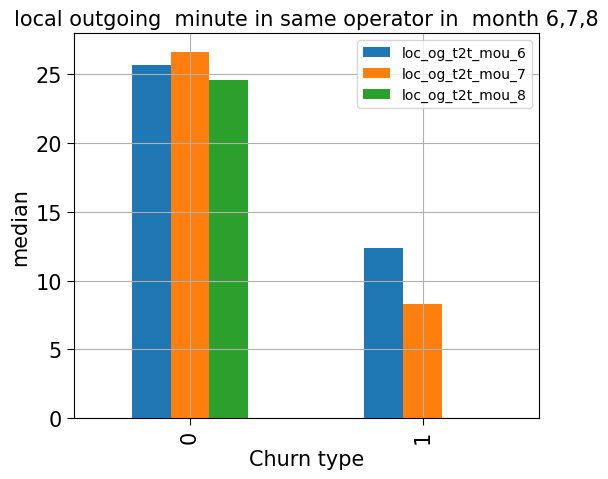

In [73]:
# loc_og_t2t_mou_6
telecom_highvalue.groupby("churn")["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in same operator in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Local outgoing  minute in same operator in  month 6,7,8 are less, users are more likely to churn.

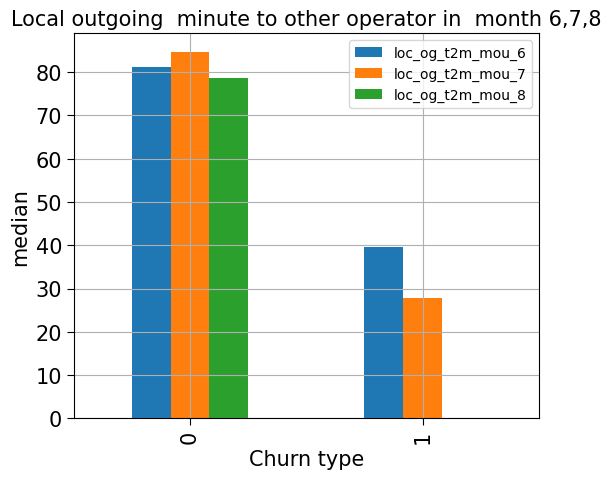

In [74]:
telecom_highvalue.groupby("churn")["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Local outgoing  minute to other operator in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Local outgoing  minute to other operator is less, more likely to churn

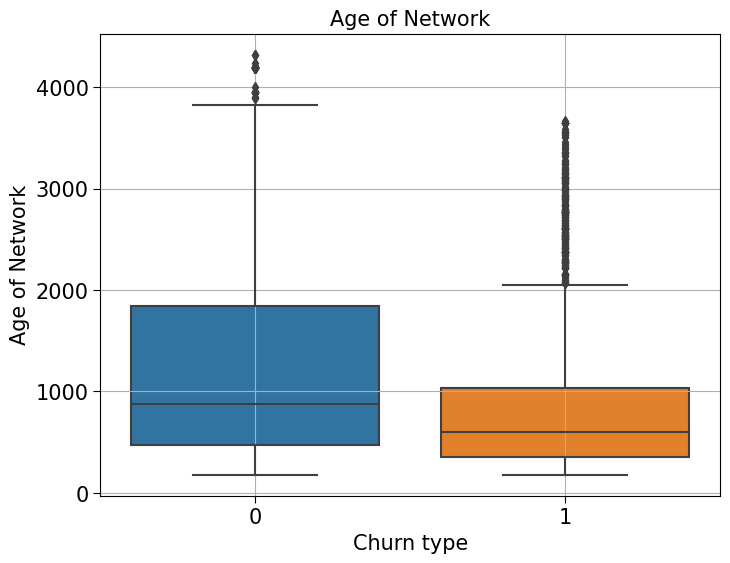

In [75]:
plt.figure(figsize=[8,6])
sns.boxplot(data=telecom_highvalue,x="churn",y="aon")
plt.tick_params(size=5,labelsize = 15) 
plt.title("Age of Network",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.ylabel("Age of Network",fontsize=15)
plt.grid(0.3)
plt.show()

 -  Median Age of network less,more likely to churn

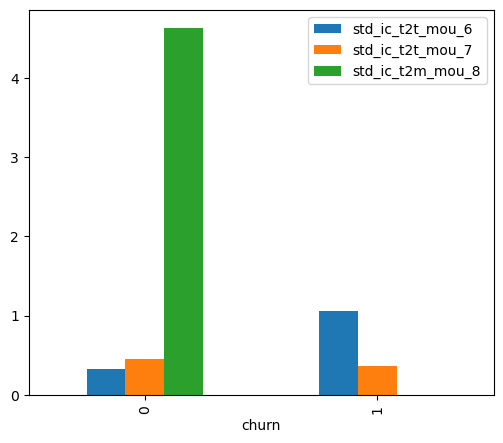

In [76]:
telecom_highvalue.groupby("churn")["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.show()

 -  Users who are using more STD calls are more likely to churn.

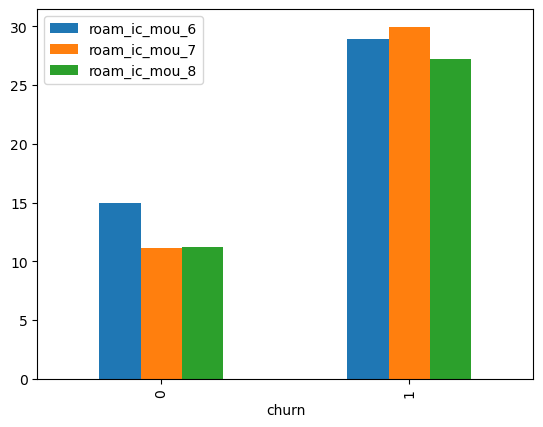

In [77]:
telecom_highvalue.groupby("churn")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar()
plt.show()

 - Roaming in incoming minutes more, they are likely to churn more.

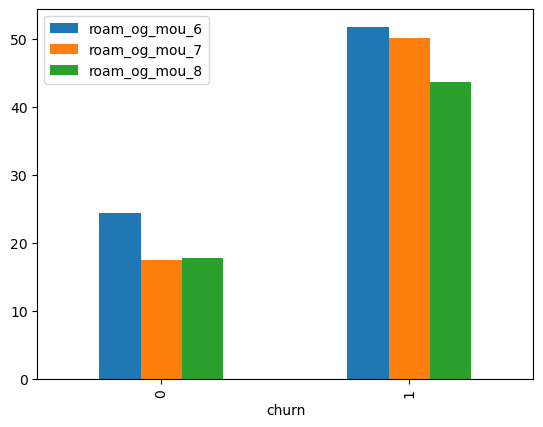

In [78]:
telecom_highvalue.groupby("churn")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar()
plt.show()

 -  roaming in outgoing minutes more, Users are more likely to churn.

In [79]:
telecom_highvalue.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9

## Model Building

In [80]:
#Load required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

## Train test split of data

In [81]:
#Peform the train test split 
train,test = train_test_split(telecom_highvalue,test_size=0.2,random_state=48)

In [82]:
# check the training and testing data shape
print(f"train data shape:{train.shape}")
print(f"Test data shape:{test.shape}")

train data shape:(24000, 164)
Test data shape:(6001, 164)


In [83]:
#Convert categorical data to numeric columns by aggregation.
categorical_columns = ["night_pck_user_6","night_pck_user_7",
                       "night_pck_user_8","fb_user_6",          
                       "fb_user_8","fb_user_7"]  

In [84]:
train[categorical_columns].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_8,fb_user_7
33114,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4101,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
40361,0.0,0.0,0.0,1.0,1.0,1.0
11213,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14484,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [85]:
#Calculate categorical features mean and replace those with categorical value
print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('night_pck_user_8')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())
print(train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.099621
 0.0    0.066717
 1.0    0.098462
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.116741
 0.0    0.054784
 1.0    0.058020
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141980
 0.0    0.028647
 1.0    0.019084
Name: churn, dtype: float64
fb_user_6
-1.0    0.099621
 0.0    0.083333
 1.0    0.066233
Name: churn, dtype: float64
fb_user_7
-1.0    0.116741
 0.0    0.065279
 1.0    0.053977
Name: churn, dtype: float64
fb_user_8
-1.0    0.141980
 0.0    0.067373
 1.0    0.023955
Name: churn, dtype: float64


In [86]:
#Map each categorical value with mean value
mapping = {'night_pck_user_6' : {-1: 0.099621, 0: 0.066717, 1: 0.098462},
           'night_pck_user_7' : {-1: 0.116741, 0: 0.054784, 1: 0.058020},
           'night_pck_user_8' : {-1: 0.141980, 0: 0.028647, 1: 0.019084},
           'fb_user_6'        : {-1: 0.099621, 0: 0.083333, 1: 0.066233},
           'fb_user_7'        : {-1: 0.116741, 0: 0.065279, 1: 0.053977},
           'fb_user_8'        : {-1: 0.141980, 0: 0.067373, 1: 0.023955}}

#convert categorical to Numeric features by aggregation and replace in train data
train.replace(mapping, inplace = True)
#replace the same in test data
test.replace(mapping, inplace = True)

In [87]:
# segregate  X_train and y_train 
y_train = train.pop("churn")
X_train = train

In [88]:
# Segregate X_test and y_test
y_test = test.pop("churn")
X_test = test

## Perform Oversampling with  SMOTE

- As we have imbalance data set, we will oversample only the training set data

In [89]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=48)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)

In [90]:
# Check the shape after Oversampling
print(f"Shape of train data after oversampling: {X_train_resample.shape}")
print(f"Value count of training target variable:\n{y_train_resample.value_counts()}")

Shape of train data after oversampling: (44082, 163)
Value count of training target variable:
1    22041
0    22041
Name: churn, dtype: int64


- __Now the non-churn and churn data is balanced.__

### Scaling
- We need to perform the scaling to feed the scaled data to PCA
- We are using minmax scaling 

In [91]:
# Import library and perform scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scale = MinMaxScaler()
temp_x_train = scale.fit_transform(X_train_resample)

#Form the dataframe after scaling
X_train_scale = pd.DataFrame(temp_x_train,columns=X_train.columns)
# Check the shape of scaled data
X_train_scale.shape

(44082, 163)

In [92]:
# check the scaled train data head 
X_train_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.088949,0.079537,0.035792,0.012317,0.033941,0.010586,0.113348,0.222906,0.043536,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001219,0.000349,0.001095,0.009311,0.003848,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000842,0.006837,0.002812,0.012334,0.032967,0.010291,0.113374,0.227516,0.042346,0.0,0.0,0.0,0.122559,0.217668,0.048155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.122371,0.213962,0.049474,0.001132,0.006249,0.000000,0.008506,0.045379,0.014468,0.000000,0.000000,0.000000,0.006936,0.034184,0.012467,0.005046,0.008226,0.011565,0.023190,0.016396,0.048285,0.000000,0.0,0.0,0.027416,0.019819,0.048169,0.020384,0.046792,0.044844,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.022801,0.057971,0.036232,0.014379,0.028115,0.004413,0.062344,0.062344,0.033715,0.062344,0.031920,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,1.0,1.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,1.0,1.0,1.0,0.198261,0.000000,0.000000,0.000000,0.000000,0.291331,0.517507,0.312350,0.364979,0.4409,0.413805,0.307091,0.532149,0.591360,0.308923,0.515282,0.470083,0.636286,0.785335,0.623545,0.605428,0.297260,0.423304,0.36747,0.520098,0.658887,0.370292,0.441836
1,0.091309,0.072997,0.044006,0.068476,0.113913,0.105521,0.029152,0.036250,0.016693,0.0,0.0,0.0,0.0,0.0,0.0,0.001104,0.002456,0.001856,0.018993,0.015396,0.023881,0.000000,0.000000,0.000000,0.011163,0.0,0.000000,0.015692,0.011728,0.017163,0.067656,0.112087,0.104010,0.017647,0.030158,0.0082

In [93]:
# Perform the scaling on test set
temp_x_test = scale.transform(X_test)
# form the test set dataframe after scaling
X_test_scale = pd.DataFrame(temp_x_test,columns=X_test.columns)

In [94]:
# check the scaled test data head 
X_test_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.090964,0.075823,0.042129,0.008711,0.010712,0.026989,0.148318,0.286030,0.107864,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.010546,0.012200,0.030885,0.246407,0.605075,0.303640,0.000000,0.000000,0.000000,0.000000,0.002106,0.000000,0.199846,0.380166,0.224896,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.075312,0.006067,0.004641,0.000000,0.0,0.0,0.153950,0.250982,0.123010,0.003793,0.005750,0.005960,0.019729,0.031392,0.017978,0.002318,0.000983,0.000749,0.017828,0.025211,0.020142,0.000000,0.000000,0.000000,0.000000,0.000177,0.000173,0.000000,0.000132,0.000043,0.000000,0.000162,0.000154,0.016466,0.025289,0.023124,0.0167,0.0,0.0,0.0,0.0,0.0,0.000253,0.001377,0.015985,0.029316,0.057971,0.036232,0.014550,0.022809,0.010812,0.027431,0.037406,0.029220,0.027431,0.037406,0.011238,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,1.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,1.0,1.0,1.0,0.608307,0.000000,0.0,0.0,0.000000,0.305153,0.541374,0.335180,0.364979,0.440900,0.374800,0.359193,0.532149,0.570622,0.343367,0.520059,0.455435,0.636286,0.777376,0.619594,0.601253,0.315762,0.437850,0.367470,0.520098,0.658887,0.370292,0.441836
1,0.091021,0.069884,0.037593,0.000381,0.001873,0.001295,0.039266,0.039306,0.027770,0.027926,0.051939,0.013461,0.087727,0.14056,0.027043,0.000000,0.000000,0.000565,0.000000,0.000000,0.023056,0.000000,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.000000,0.015499,0.00000,0.0,

- Use X_train_scale and X_test_scale in PCA

## PCA

- we have almost 140 features to train the model
- to remove collinearity and faster training we can perform dimensionality reduction technique PCA.

In [95]:
# Load the library
from sklearn.decomposition import PCA
pc_class = PCA(random_state=60)
X_train_pca = pc_class.fit(X_train_scale)

In [96]:
# Check the explained_variance_ratio_ whihc tells us individual principal component variance.
X_train_pca.explained_variance_ratio_

array([6.03828617e-01, 1.40973413e-01, 9.91155206e-02, 3.07631658e-02,
       1.86234669e-02, 1.18416165e-02, 9.48517523e-03, 8.28397598e-03,
       6.72748174e-03, 6.66714826e-03, 6.48765005e-03, 4.03245946e-03,
       3.54239498e-03, 3.02625956e-03, 2.62601134e-03, 2.36736548e-03,
       2.22188138e-03, 2.11335787e-03, 2.04027551e-03, 1.85954948e-03,
       1.80479200e-03, 1.69169327e-03, 1.44245222e-03, 1.39627736e-03,
       1.38652402e-03, 1.32326350e-03, 1.20520271e-03, 1.16539268e-03,
       1.09180753e-03, 9.87446077e-04, 9.32626988e-04, 8.50296303e-04,
       8.22568575e-04, 8.09298469e-04, 7.93824971e-04, 7.32863836e-04,
       7.15982444e-04, 6.64938130e-04, 6.26470521e-04, 6.16430322e-04,
       5.83678714e-04, 5.55821255e-04, 5.11635457e-04, 4.75816882e-04,
       4.69430576e-04, 4.39348363e-04, 4.29142579e-04, 4.02705885e-04,
       3.62016817e-04, 3.53569223e-04, 3.44779423e-04, 3.28864327e-04,
       3.16730775e-04, 3.00533635e-04, 2.84082281e-04, 2.80172818e-04,
      

In [97]:
# perform the cumulaltive sum of explained variance
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)
#Convert explained variance to DataFrame
var_cumu_df = pd.DataFrame({"variance":var_cumu}) 
var_cumu_df.head(30) 

,variance
0,0.603829
1,0.744802
2,0.843918
3,0.874681
4,0.893304
5,0.905146
6,0.914631
7,0.922915
8,0.929642
9,0.936310


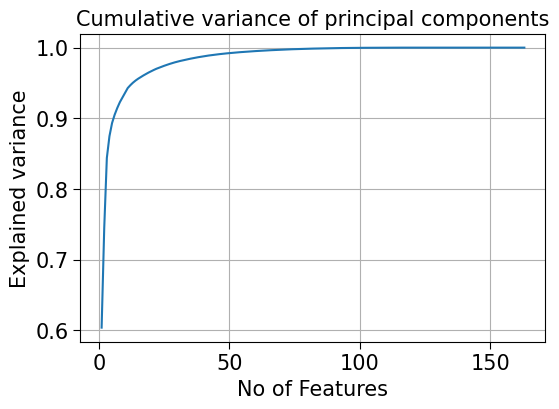

In [98]:
# Plot the cumulative explained variance : SCREE Plot
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.title("Cumulative variance of principal components",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("No of Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

In [99]:
# By providing variance value we can also get the suitable principal components.
pca_demo = PCA(0.96,random_state=40)
X_train_pca1 = pca_demo.fit_transform(X_train_scale)
print(f"suitable principal components for 96% of variance:{X_train_pca1.shape[1]}")

suitable principal components for 96% of variance:17


- __Now we got suitable no of principal components as 17__
- __Hence we will do PCA again with 18 components for train and test set.__

In [100]:
# Instantiate PCA with 17 components 
pca_object = PCA(n_components=17,random_state=48)
# get the PCs for train data
X_train_pca_final = pca_object.fit_transform(X_train_scale)
# get the PCs for test data
X_test_pca_final = pca_object.fit_transform(X_test_scale)

#check the shape of train and test data after PCA
print(X_train_pca_final.shape)
print(X_test_pca_final.shape)

(44082, 17)
(6001, 17)


In [101]:
# Check the correlations after PCA
np.corrcoef(X_train_pca_final.transpose())

array([[ 1.00000000e+00, -5.67098964e-17,  4.05796108e-17,
         2.42796232e-17,  1.17019559e-17, -9.78344861e-18,
        -3.27941245e-17, -4.09398356e-17,  3.89396898e-17,
         2.60769875e-17,  1.98264535e-17,  8.38274415e-17,
        -8.94379816e-17,  3.71947946e-17, -2.59702678e-18,
         3.00956601e-17, -3.67557433e-17],
       [-5.67098964e-17,  1.00000000e+00, -5.86137741e-16,
         6.28116489e-18, -2.01820581e-17, -2.65753822e-17,
         2.82795854e-18, -1.51302571e-18, -1.00737400e-17,
         2.36115075e-17,  6.83883341e-17, -5.20470004e-17,
         3.23927842e-17, -2.12786568e-17, -3.76238043e-17,
        -2.12339453e-17, -8.63101988e-17],
       [ 4.05796108e-17, -5.86137741e-16,  1.00000000e+00,
         4.16685120e-17,  1.20346435e-18,  8.30081410e-18,
        -5.05896961e-18,  1.12777924e-17, -6.25730442e-18,
        -6.28555275e-18, -1.80962325e-17,  3.87947981e-18,
        -2.10405876e-17,  2.08987879e-17, -2.72427767e-17,
         7.57075396e-18,  3.8

 - __The correlation values are almost close to 0( power raised to -17,-18,-19) except the diagonal.__

## Model Building:

- We will explore below models.
    - Logistic regression
    - Decision tree
    - Randomforest
    - Gradientboosting
    - XGboost


In [102]:
#Function definition to check the performance of model on test data
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
# Check the performance on test set
#Precision
#recall
#f1_score
#ROC_AUC
def calculate_peformance_testdata(model_name,y_test,y_pred,pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
#     return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]})   

In [103]:
# Create a DataFrame which stores all test score for each model
score_df = pd.DataFrame({"Model":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

### Logistic regression

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Instantiate logistic regression
lr_obj = LogisticRegression(random_state=40)
#pass PCA data as input
lr_obj.fit(X_train_pca_final, y_train_resample)
cv_score = cross_val_score(lr_obj, X_train_pca_final, y_train_resample, cv=5, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")


Cross validation score: [0.82896677 0.84484519 0.84051724 0.83836207 0.83949637]


In [105]:
#Prediction on  pca testdata
y_pred_lr = lr_obj.predict(X_test_pca_final)
#check predict probability on pca data
pred_prob = lr_obj.predict_proba(X_test_pca_final)

In [106]:
#check various scores on test data
df1 = calculate_peformance_testdata("LogisticRegression",y_test,y_pred_lr,pred_prob[:,1])

LogisticRegression:
precision: 0.09159005788219271
recall: 0.558091286307054
f1_score: 0.15735595203275812
roc_auc: 0.576069917651508


In [107]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = score_df.append(df1)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.09159,0.558091,0.157356,0.57607


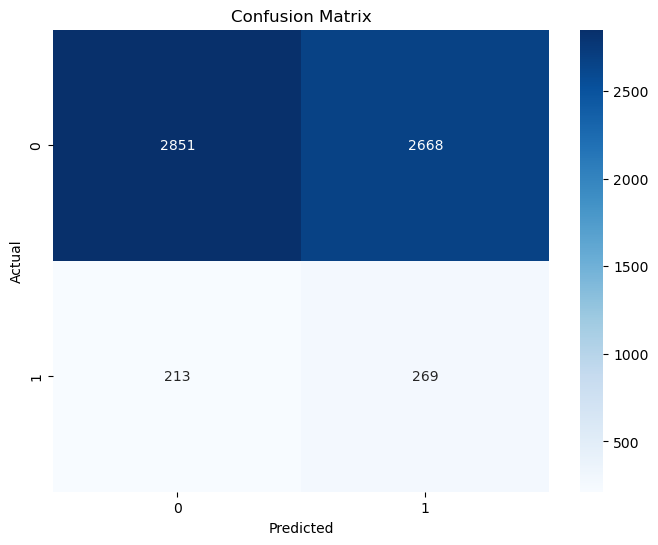

In [172]:
#Plot confusion matrix for Logistic Regression 
#metrics.plot_confusion_matrix(lr_obj, X_test_pca_final, y_test)
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming lr_obj is your trained logistic regression classifier
# Assuming X_test_pca_final and y_test are your test data

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, lr_obj.predict(X_test_pca_final))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

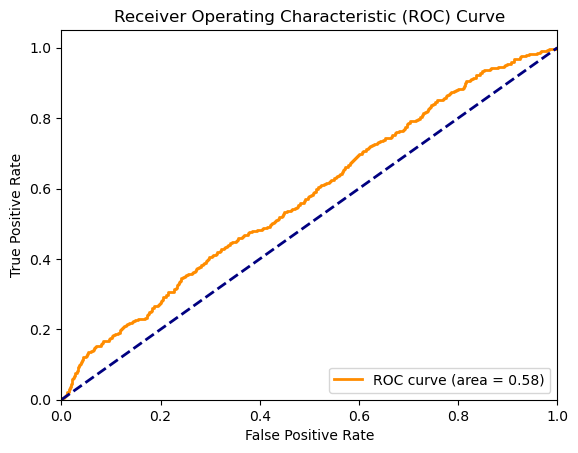

In [173]:
#Plot ROC_AUC Curve for Logistic Regression
#metrics.plot_roc_curve(lr_obj, X_test_pca_final, y_test)
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_obj.predict_proba(X_test_pca_final)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## DecisionTree

X_train_resample,y_train_resample

In [110]:
from sklearn.tree import DecisionTreeClassifier
#Instantiate Decision tree with defautl parameter
dt_obj=  DecisionTreeClassifier(random_state=40)

# here we have used data generated by SMOTE. 
dt_obj.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(dt_obj, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(cv_score)


[0.88125213 0.92491777 0.92343466 0.93160163 0.93216878]


In [111]:
#check the default paramters 
dt_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

In [113]:
#Perform hyperparamter tuning with randomizedsearchcv
param_grid = dict({"max_leaf_nodes":[4,5,6],"min_samples_leaf":[3,4,5],'min_samples_split':[3,4,5]})
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf_rcv = RandomizedSearchCV(dt_clf,param_grid,cv=5,scoring="f1_micro")# n_jobs=-1
dt_clf_rcv.fit(X_train_scale, y_train_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'max_leaf_nodes': [4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5]},
                   scoring='f1_micro')

In [114]:
#check the beat score and best estimator paramters
print(dt_clf_rcv.best_score_)
print(dt_clf_rcv.best_estimator_)

0.8546802785906701
DecisionTreeClassifier(max_leaf_nodes=5, min_samples_leaf=3,
                       min_samples_split=4, random_state=40)


In [115]:
# dt_clf_rcv.cv_results_

In [116]:
#Train the decision tree with best paramters obtained from above step
# Commented out the hyperparamter tuning as it takes sometime to execute
dt_clf = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_leaf=4,min_samples_split=5,random_state=40)
dt_clf.fit(X_train_scale,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=40)

In [117]:
#perform the prediction 
y_pred_dt = dt_clf.predict(X_test_scale)
#Perform the prediction probability
pred_prob = dt_clf.predict_proba(X_test_scale)

In [118]:
##check the scores.
df2 = calculate_peformance_testdata("DecisionTree",y_test,y_pred_dt,pred_prob[:,1])

DecisionTree:
precision: 0.33690360272638753
recall: 0.7178423236514523
f1_score: 0.4585818422796554
roc_auc: 0.8510624180969703


In [119]:
#Add the score to Dataframe  for comparision 
score_df = score_df.append(df2)
score_df.dropna(inplace=True)
score_df.drop_duplicates(inplace=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091590,0.558091,0.157356,0.576070
0,DecisionTree,0.336904,0.717842,0.458582,0.851062


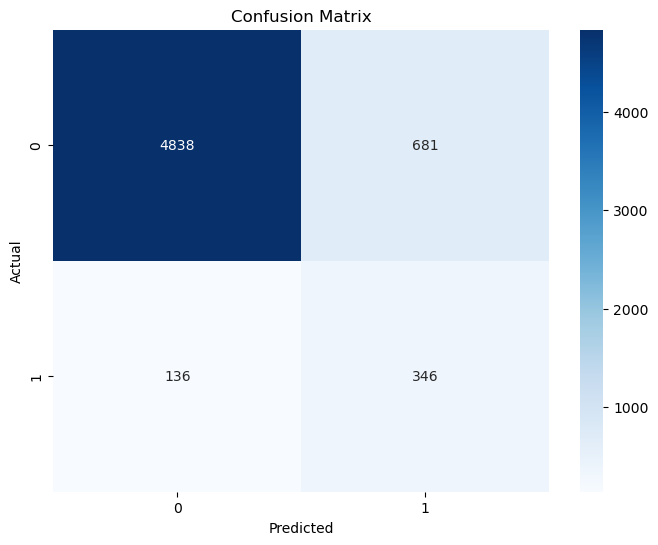

In [171]:
#visualize the confusion matrix
#metrics.plot_confusion_matrix(dt_clf, X_test_scale, y_test)
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Compute confusion matrix
conf_mat = confusion_matrix(y_test, dt_clf.predict(X_test_scale))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

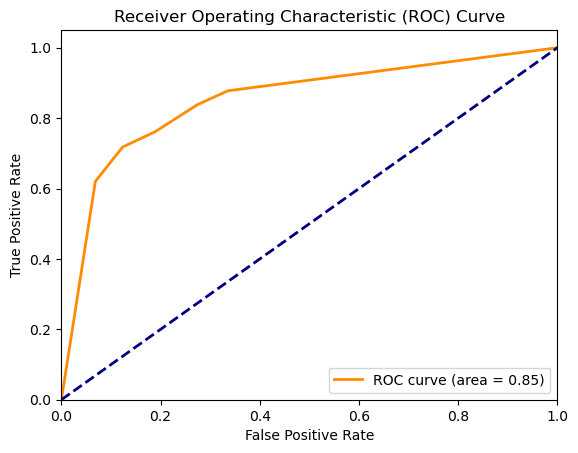

In [123]:
#plot the ROC_AUC curve


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_clf.predict_proba(X_test_scale)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Randomforest

In [124]:
#Instantiate RandomForest, train with default parameters
rf_class = RandomForestClassifier(n_jobs=-1) #class_weight={0:1,1:2}
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [125]:
#check the default parameters
rf_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [128]:
#Use best paramters to train the model
rf_class = RandomForestClassifier(min_samples_leaf=3,n_estimators=120,n_jobs=-1,random_state=40)
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [129]:
#check the scores 
df3 = calculate_peformance_testdata("RandomForest",y_test,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.5862708719851577
recall: 0.6556016597510373
f1_score: 0.6190009794319294
roc_auc: 0.9244024227132374


In [130]:
#Add score to the dataframe for comparision 
score_df = score_df.append(df3)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091590,0.558091,0.157356,0.576070
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402


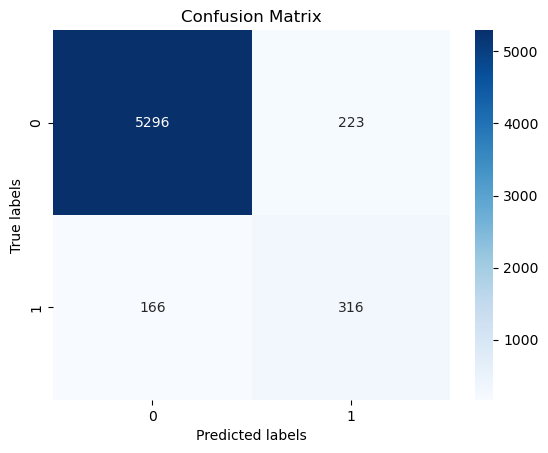

In [132]:
#visualize confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = rf_class.predict(X_test_scale)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

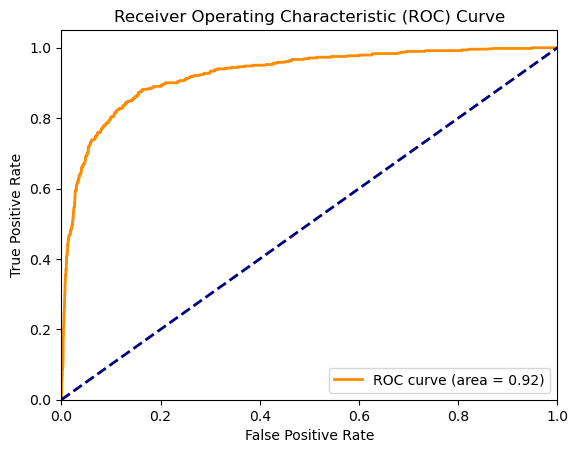

In [135]:
#plot roc auc cureve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_class.predict_proba(X_test_scale)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## GradientBoosting

In [136]:
#Train gradient boosting with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_class = GradientBoostingClassifier(random_state=42,min_samples_leaf=4,min_samples_split=5)
# n_estimators=110,min_samples_leaf=2,min_samples_split=3,learning_rate=0.2
gb_class.fit(X_train_scale,y_train_resample)

#get the predicated label
y_pred_gb = gb_class.predict(X_test_scale)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_test_scale)

In [137]:
#check the training default parameters
gb_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [140]:
#Check the test scores
df4 = calculate_peformance_testdata("GradientBoosting",y_test,y_pred_gb,pred_prob[:,1])

GradientBoosting:
precision: 0.48326055312954874
recall: 0.6887966804979253
f1_score: 0.5680068434559452
roc_auc: 0.9197948016621568


In [141]:
#Add the scores to dataframe
score_df=score_df.append(df4)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091590,0.558091,0.157356,0.576070
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795


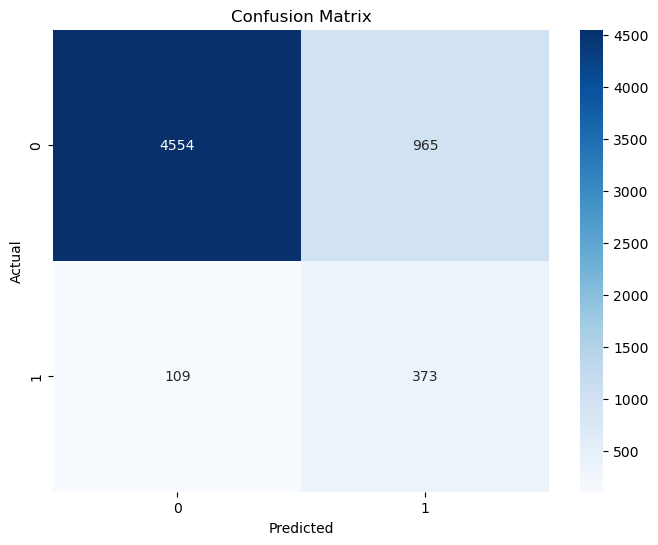

In [143]:
#Plot the confusion matrix
#metrics.plot_confusion_matrix(gb_class, X_test, y_test)
#plt.show()
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, gb_class.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

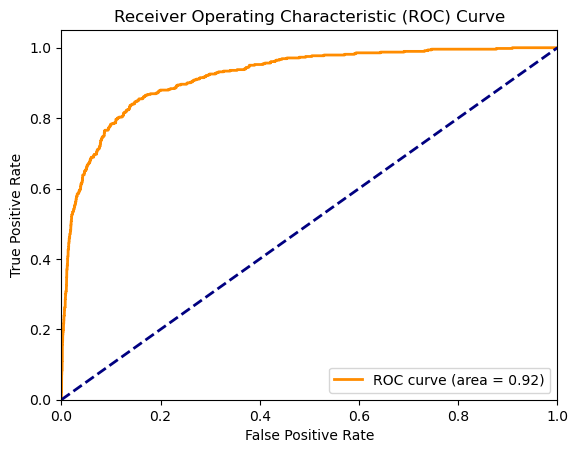

In [145]:
#plot the roc curve
#metrics.plot_roc_curve(gb_class, X_test_scale, y_test)
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_class.predict_proba(X_test_scale)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Xgboost

In [146]:
# !pip install xgboost

In [147]:
import xgboost as xgb

In [148]:
# Model training with default paamters

xgb_class = xgb.XGBClassifier(max_depth=10)
xgb_class.fit(X_train_scale,y_train_resample)

#Model prediction 
y_pred_xgb = xgb_class.predict(X_test_scale)
#Model predict probability
pred_prob = xgb_class.predict_proba(X_test_scale)

In [149]:
#check the model default paramters
xgb_class.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [152]:
#
# xgb_class = xgb.XGBClassifier()

In [153]:
#predict the  labels of test data
# y_pred_xgb = xgb_class.predict(X_test_scale)
# #chekc the predict probability
# pred_prob = xgb_class.predict_proba(X_test_scale)

In [154]:
#check the scores
df5 = calculate_peformance_testdata("XGBoost",y_test,y_pred_xgb,pred_prob[:,1])

XGBoost:
precision: 0.6560975609756098
recall: 0.558091286307054
f1_score: 0.6031390134529148
roc_auc: 0.9295804986019627


In [155]:
#add the score to dataframe
score_df= score_df.append(df5)
score_df.drop_duplicates()

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091590,0.558091,0.157356,0.576070
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.656098,0.558091,0.603139,0.929580


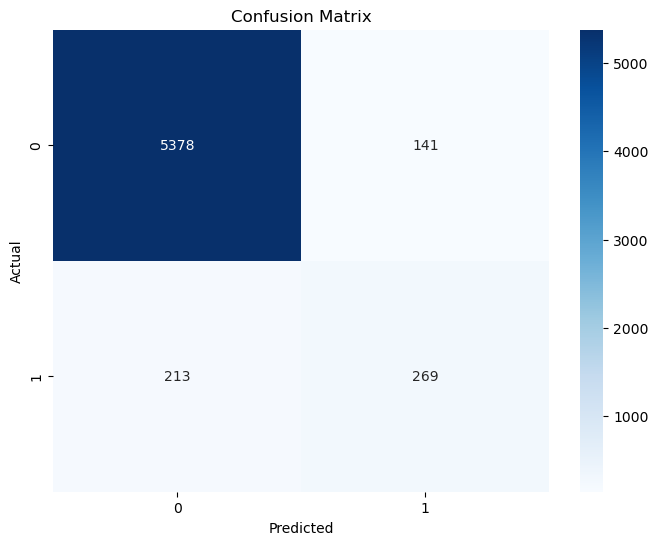

In [157]:
#Plot confusion matrix
#metrics.plot_confusion_matrix(xgb_class, X_test_scale, y_test)
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, xgb_class.predict(X_test_scale))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


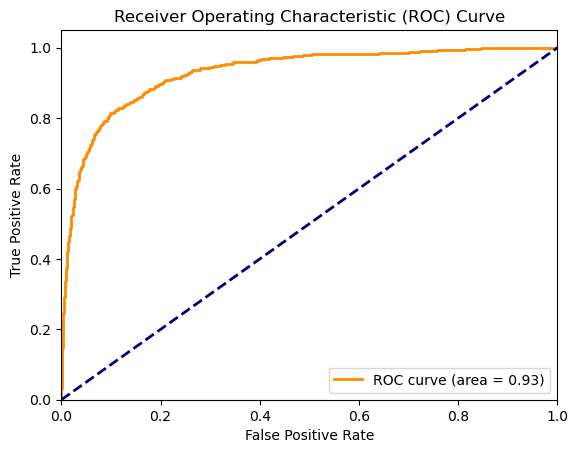

In [159]:
#plot roc curve
#metrics.plot_roc_curve(xgb_class, X_test_scale, y_test)
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_class.predict_proba(X_test_scale)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [160]:
#check how various model is performing on test set on Churn=1.
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091590,0.558091,0.157356,0.576070
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.656098,0.558091,0.603139,0.929580


 - __The randomforest worked well on this data in churn with precision  close to 59%, recall close to 65% and f1_score close to 61%.__
 - In Logistic regression we have used PCA.
 -  In this scenario, Without PCA model works well.

## Fearure Importance and Model Interpretation


In [161]:
# Randomforest model training 
gb_object = RandomForestClassifier(random_state=40)
gb_object.fit(X_train_resample,y_train_resample)
y_pred = gb_object.predict(X_test)

In [162]:
#check the performance on test data
calculate_peformance_testdata("RandomForest",y_test,y_pred,pred_prob[:,1])

RandomForest:
precision: 0.6056338028169014
recall: 0.6244813278008299
f1_score: 0.6149131767109295
roc_auc: 0.9295804986019627


,Model,precision,recall,f1_score,roc_auc
0,RandomForest,0.605634,0.624481,0.614913,0.92958


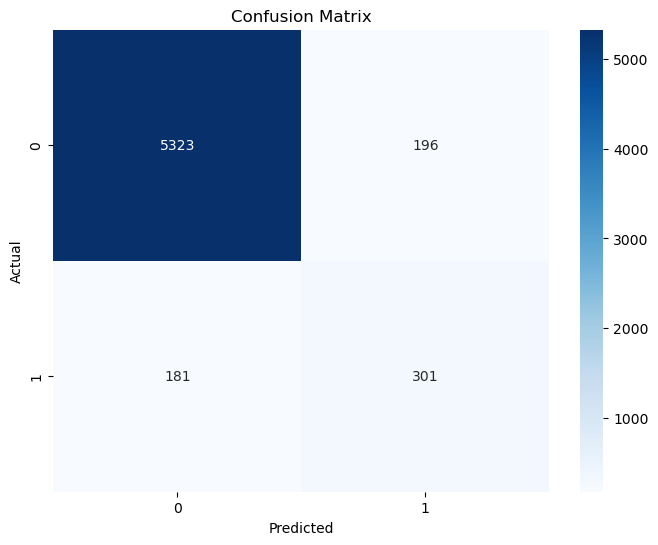

In [164]:
#plot confusion matrix
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(gb_object, X_test, y_test)
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, gb_object.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

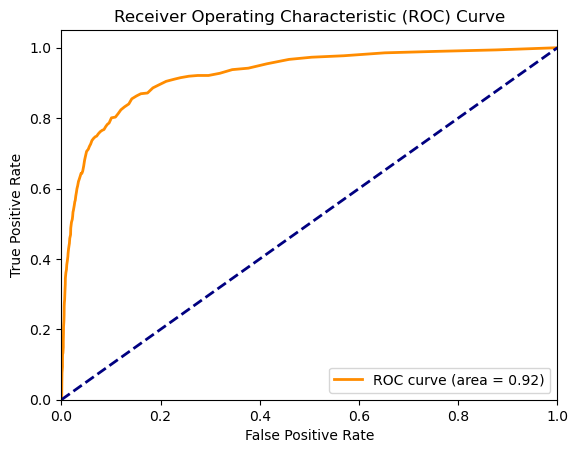

In [166]:
#plot ROC curve
#metrics.plot_roc_curve(gb_object, X_test, y_test) 
#plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_object.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [167]:
#check the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5519
           1       0.61      0.62      0.61       482

    accuracy                           0.94      6001
   macro avg       0.79      0.79      0.79      6001
weighted avg       0.94      0.94      0.94      6001



In [168]:
#Create a Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":X_train.columns,"feature_importance":gb_object.feature_importances_})


In [169]:
#check 40 important features
fi = Feature_importance.sort_values(by="feature_importance",ascending=False).head(40)
fi

,columns,feature_importance
80,total_ic_mou_8,0.066874
95,total_rech_amt_8,0.043899
134,fb_user_8,0.038620
65,loc_ic_mou_8,0.037469
119,night_pck_user_8,0.037256
11,roam_ic_mou_8,0.035839
59,loc_ic_t2m_mou_8,0.033583
29,loc_og_mou_8,0.027910
2,arpu_8,0.027545
156,total_rech_amt_diff,0.026513


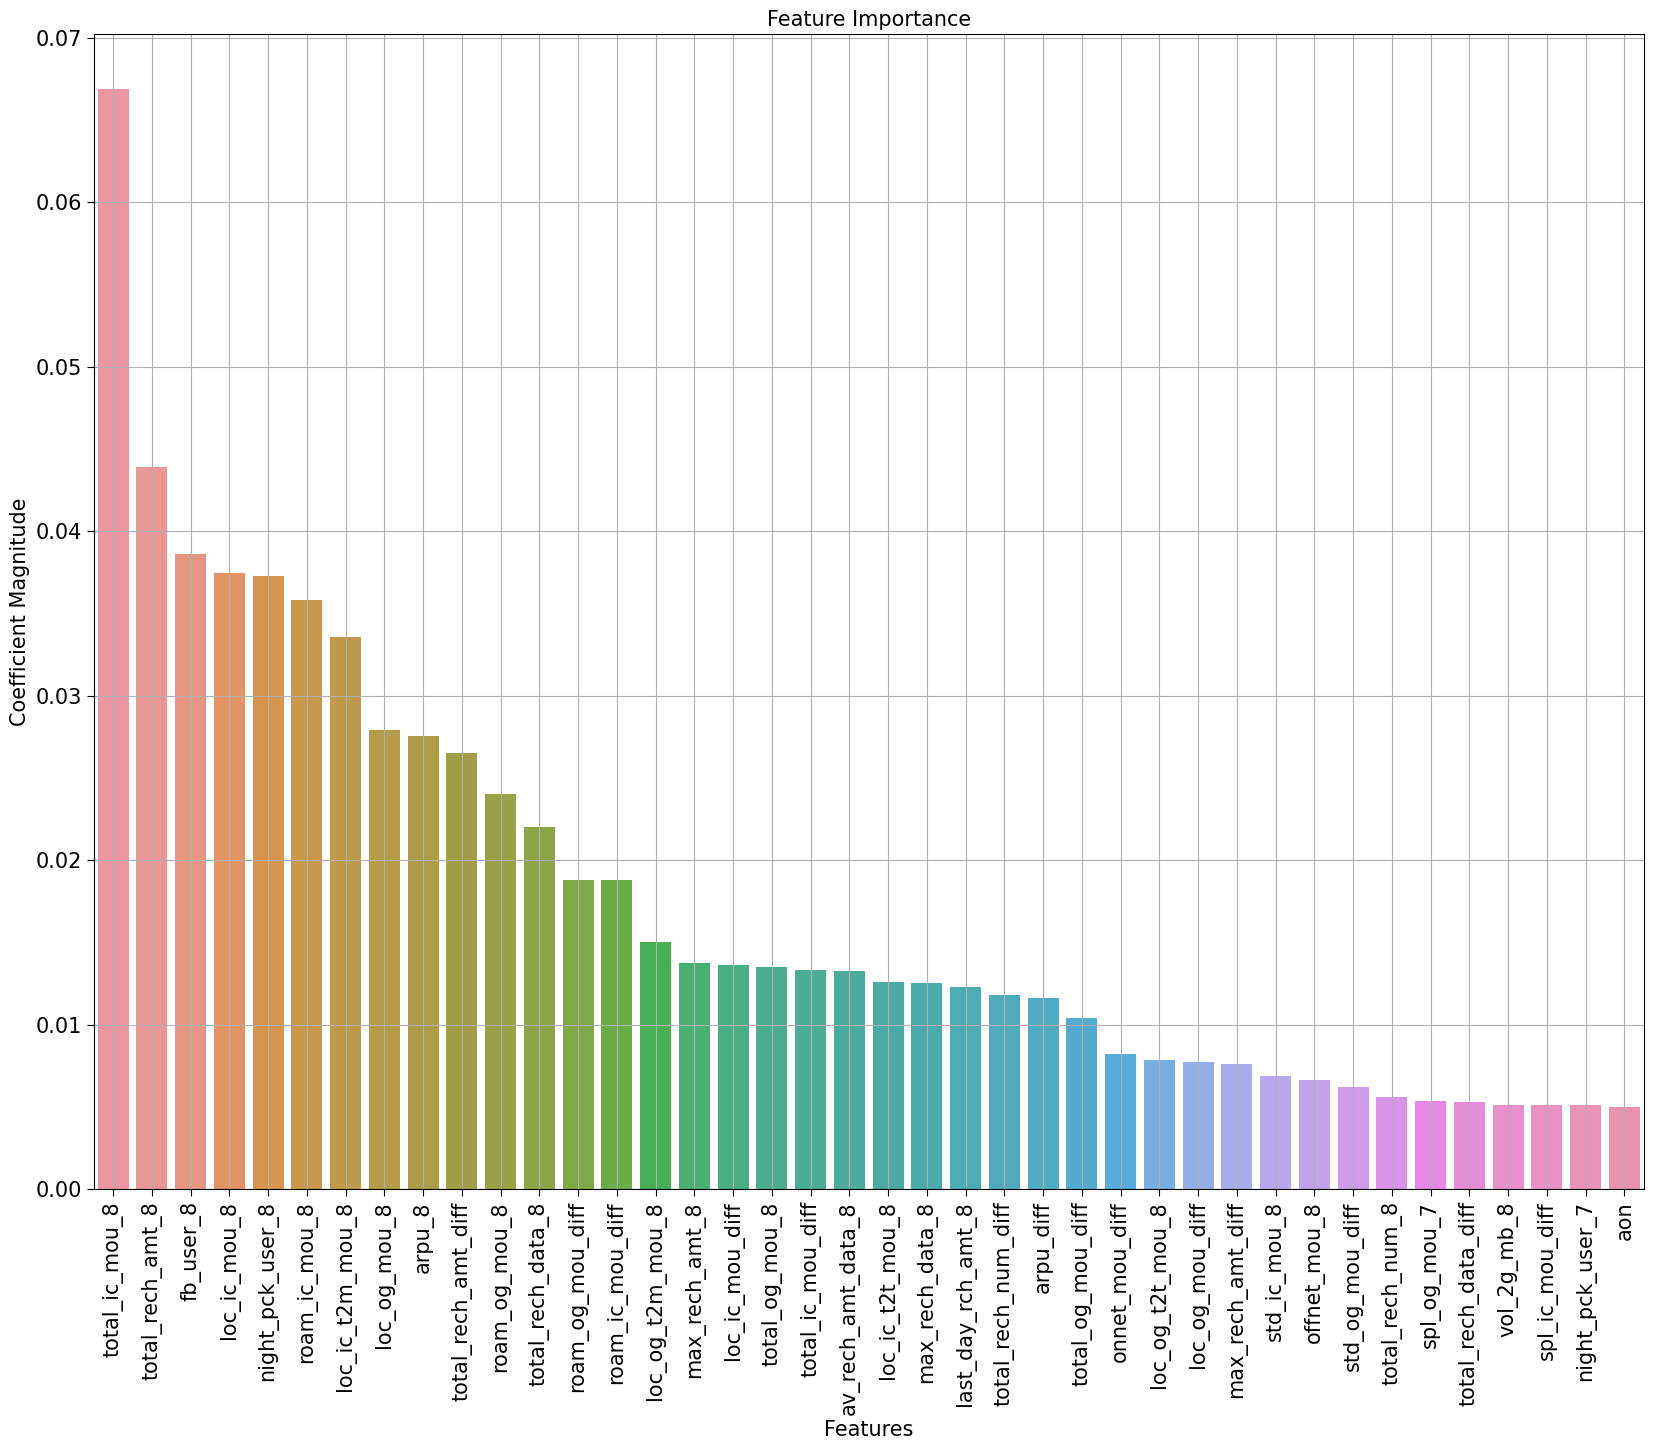

In [170]:
#Plot to show the feature importance
plt.figure(figsize=[20,15])
sns.barplot(x = "columns",y="feature_importance",data=fi)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

## Conclusion:
 - The most important features are as shown in above graph.
 - Average revenue per user more, those are likely to churn  if they are not happy with the network.
 - Local calls minutes of usage has also has impact on churn .
 - Large difference between recharge amount between 6th and 7th month, also impact churn.
 - Users who are using more Roaminng in Outgoing and Incoming calls, are likely to churn.The Compnay can focus on these too.

    
 